# Customers

## Details:
### on this project we work on a dataset of users who are customers of a service provider 

In [44]:
import numpy as np
import pandas as pd
import pylab as pl
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline

In [45]:
df=pd.read_csv('c:\\users\\admin\\ML_Project\\Customer_Clustering\\Customer.csv')

In [46]:
df.head(5)

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

In [47]:
df.shape

(200, 5)

In [48]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

# Pre-Processing

- as dtype command shows,we have a clumn named Gender that is Object and we should change its type to the values(0,1) to be able to use it in our analysis
- Another appropriate preprocessing maybe the changing column names and replacing simple names. for this section three column can be good candidates: (	CustomerID,Annual Income (k$),Spending Score (1-100))

In [49]:
df.Gender=df.Gender.map({'Male':0,'Female':1}).astype(int)
df

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1       0   19                  15                      39
1             2       0   21                  15                      81
2             3       1   20                  16                       6
3             4       1   23                  16                      77
4             5       1   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196       1   35                 120                      79
196         197       1   45                 126                      28
197         198       0   32                 126                      74
198         199       0   32                 137                      18
199         200       0   30                 137                      83

[200 rows x 5 columns]

In [50]:
cdf=df[['CustomerID','Gender','Age','Annual Income (k$)','Spending Score (1-100)']]
cdf=cdf.rename(columns={'CustomerID':'ID','Annual Income (k$)':'Income','Spending Score (1-100)':'Score'})
cdf.describe()

ID      Gender         Age      Income       Score
count  200.000000  200.000000  200.000000  200.000000  200.000000
mean   100.500000    0.560000   38.850000   60.560000   50.200000
std     57.879185    0.497633   13.969007   26.264721   25.823522
min      1.000000    0.000000   18.000000   15.000000    1.000000
25%     50.750000    0.000000   28.750000   41.500000   34.750000
50%    100.500000    1.000000   36.000000   61.500000   50.000000
75%    150.250000    1.000000   49.000000   78.000000   73.000000
max    200.000000    1.000000   70.000000  137.000000   99.000000

In [51]:
cdf.Score.value_counts()

Score
42    8
55    7
46    6
73    6
35    5
     ..
31    1
44    1
53    1
65    1
18    1
Name: count, Length: 84, dtype: int64

## Normalizing ovwe the standard deviation
we use normalization methods to interpret different types of data with different magnitude in a meaningful scope.
- So, we use standard scaler to normalize the data.
 - we can use different types of scaler to normalize the data such as Minmaxscaler,standardscaler and .... I want to use standardscaler

In [52]:
from sklearn.preprocessing import StandardScaler
x=cdf.values[:,1:]
x=np.nan_to_num(x)
clus_dataset=StandardScaler().fit_transform(x)
clus_dataset
#x[:5]

array([[-1.12815215, -1.42456879, -1.73899919, -0.43480148],
       [-1.12815215, -1.28103541, -1.73899919,  1.19570407],
       [ 0.88640526, -1.3528021 , -1.70082976, -1.71591298],
       [ 0.88640526, -1.13750203, -1.70082976,  1.04041783],
       [ 0.88640526, -0.56336851, -1.66266033, -0.39597992],
       [ 0.88640526, -1.20926872, -1.66266033,  1.00159627],
       [ 0.88640526, -0.27630176, -1.62449091, -1.71591298],
       [ 0.88640526, -1.13750203, -1.62449091,  1.70038436],
       [-1.12815215,  1.80493225, -1.58632148, -1.83237767],
       [ 0.88640526, -0.6351352 , -1.58632148,  0.84631002],
       [-1.12815215,  2.02023231, -1.58632148, -1.4053405 ],
       [ 0.88640526, -0.27630176, -1.58632148,  1.89449216],
       [ 0.88640526,  1.37433211, -1.54815205, -1.36651894],
       [ 0.88640526, -1.06573534, -1.54815205,  1.04041783],
       [-1.12815215, -0.13276838, -1.54815205, -1.44416206],
       [-1.12815215, -1.20926872, -1.54815205,  1.11806095],
       [ 0.88640526, -0.

# Clustering

- At first, we try k-means model
## K-means

In [53]:
clus_num=5
k_means=KMeans(init='k-means++',n_clusters=clus_num,n_init=12)
k_means.fit(x)
labels=k_means.labels_
print(labels)

[3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3
 4 3 4 3 4 3 4 3 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 1 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


## Insights
now, we can have ther cluster labels as a clumn of the dataset in cdf

In [54]:
cdf['ClusterNumber']=labels
cdf.tail(5)

ID  Gender  Age  Income  Score  ClusterNumber
195  196       1   35     120     79              2
196  197       1   45     126     28              0
197  198       0   32     126     74              2
198  199       0   32     137     18              0
199  200       0   30     137     83              2

- we can easily find the centroid valuse by finding the averaging the values in each cluster

In [55]:
cdf.groupby('ClusterNumber').mean()

ID    Gender        Age     Income      Score
ClusterNumber                                                       
0              163.500000  0.472222  40.666667  87.750000  17.583333
1               86.265823  0.582278  43.088608  55.291139  49.569620
2              162.000000  0.538462  32.692308  86.538462  82.128205
3               23.000000  0.608696  45.217391  26.304348  20.913043
4               24.000000  0.608696  25.521739  26.304348  78.565217

Text(0, 0.5, 'Score')

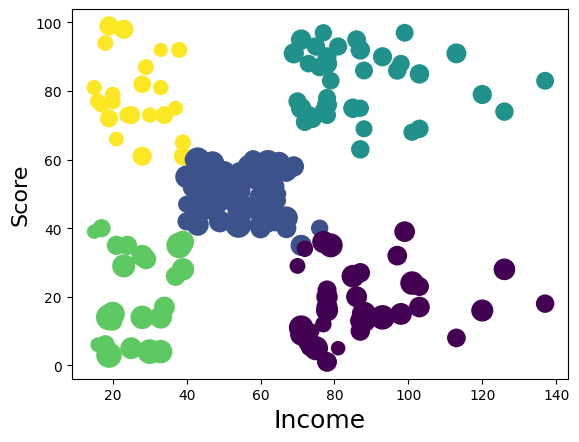

In [56]:
area=np.pi*(x[:,1])*1.5
plt.scatter(x[:,2],x[:,3],s=area,c=labels.astype(float),alpha=1)
plt.xlabel('Income',fontsize=18)
plt.ylabel('Score',fontsize=16)

# 3D plot
## we can have all three used depths in 2d plot above to make a 3d plot for better understand

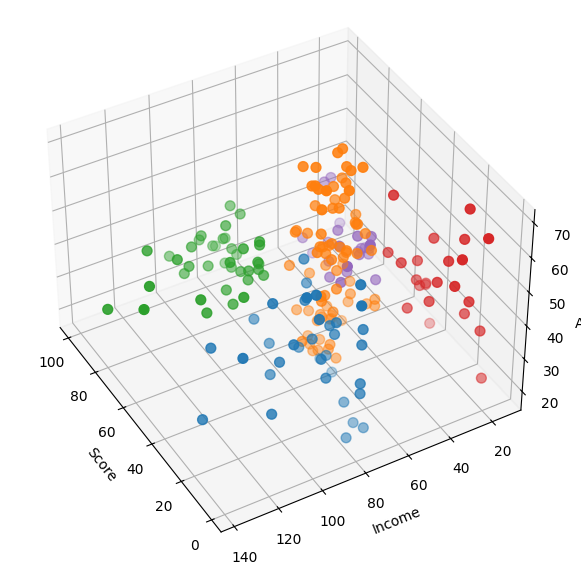

In [57]:
import matplotlib.pyplot as plt  
from mpl_toolkits.mplot3d import Axes3D  
import numpy as np  
fig = plt.figure(1, figsize=(8, 7))  
plt.clf()  
ax = fig.add_subplot(111, projection='3d')  
ax.view_init(elev=40, azim=150)  
plt.cla()  
ax.set_xlabel('Score')  
ax.set_ylabel('Income')  
ax.set_zlabel('Age')  

unique_labels = set(labels)  

# Define a colormap for the clusters  
cmap = plt.get_cmap('tab10')  

# Plot the points with fixed colors for each cluster  
for i, label in enumerate(unique_labels):  
    label_indices = labels == label  
    ax.scatter(x[label_indices, 3], x[label_indices, 2], x[label_indices, 1],   
               c=[cmap(i)], s=50)  

plt.show()  


# Other Models
### now I want to use other models to assess the efficiency of the clustering
## Hierarchial Clustering

I want to normalize the data again based on minmaxscaler

## normalization by Minmax Scaler

In [58]:
from sklearn.preprocessing import MinMaxScaler
xx=cdf.values[:,1:]
xx=np.nan_to_num(xx)
feature_mtx=MinMaxScaler().fit_transform(xx)
feature_mtx[:5]

array([[0.        , 0.01923077, 0.        , 0.3877551 , 0.75      ],
       [0.        , 0.05769231, 0.        , 0.81632653, 1.        ],
       [1.        , 0.03846154, 0.00819672, 0.05102041, 0.75      ],
       [1.        , 0.09615385, 0.00819672, 0.7755102 , 1.        ],
       [1.        , 0.25      , 0.01639344, 0.39795918, 0.75      ]])

# Clustering useing scikit-learn

In [59]:
from sklearn.metrics.pairwise import euclidean_distances #euclidean_dist helps to make dist matrix as simple as possible
distMatrix=euclidean_distances(feature_mtx,feature_mtx)
distMatrix

array([[0.        , 0.49764722, 1.05538015, ..., 1.03940016, 1.29264008,
        1.14404161],
       [0.49764722, 0.        , 1.28399006, ..., 1.06190971, 1.56780542,
        1.13153529],
       [1.05538015, 1.28399006, 0.        , ..., 1.55247351, 1.61691742,
        1.6433207 ],
       ...,
       [1.03940016, 1.06190971, 1.55247351, ..., 0.        , 0.76463073,
        0.13432353],
       [1.29264008, 1.56780542, 1.61691742, ..., 0.76463073, 0.        ,
        0.83150475],
       [1.14404161, 1.13153529, 1.6433207 , ..., 0.13432353, 0.83150475,
        0.        ]])

In [66]:
from sklearn.cluster import AgglomerativeClustering  

z = hierarchy.linkage(distMatrix, 'complete')

C:\Users\admin\AppData\Local\Temp\ipykernel_24248\3333342486.py:3: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  z = hierarchy.linkage(distMatrix, 'complete')


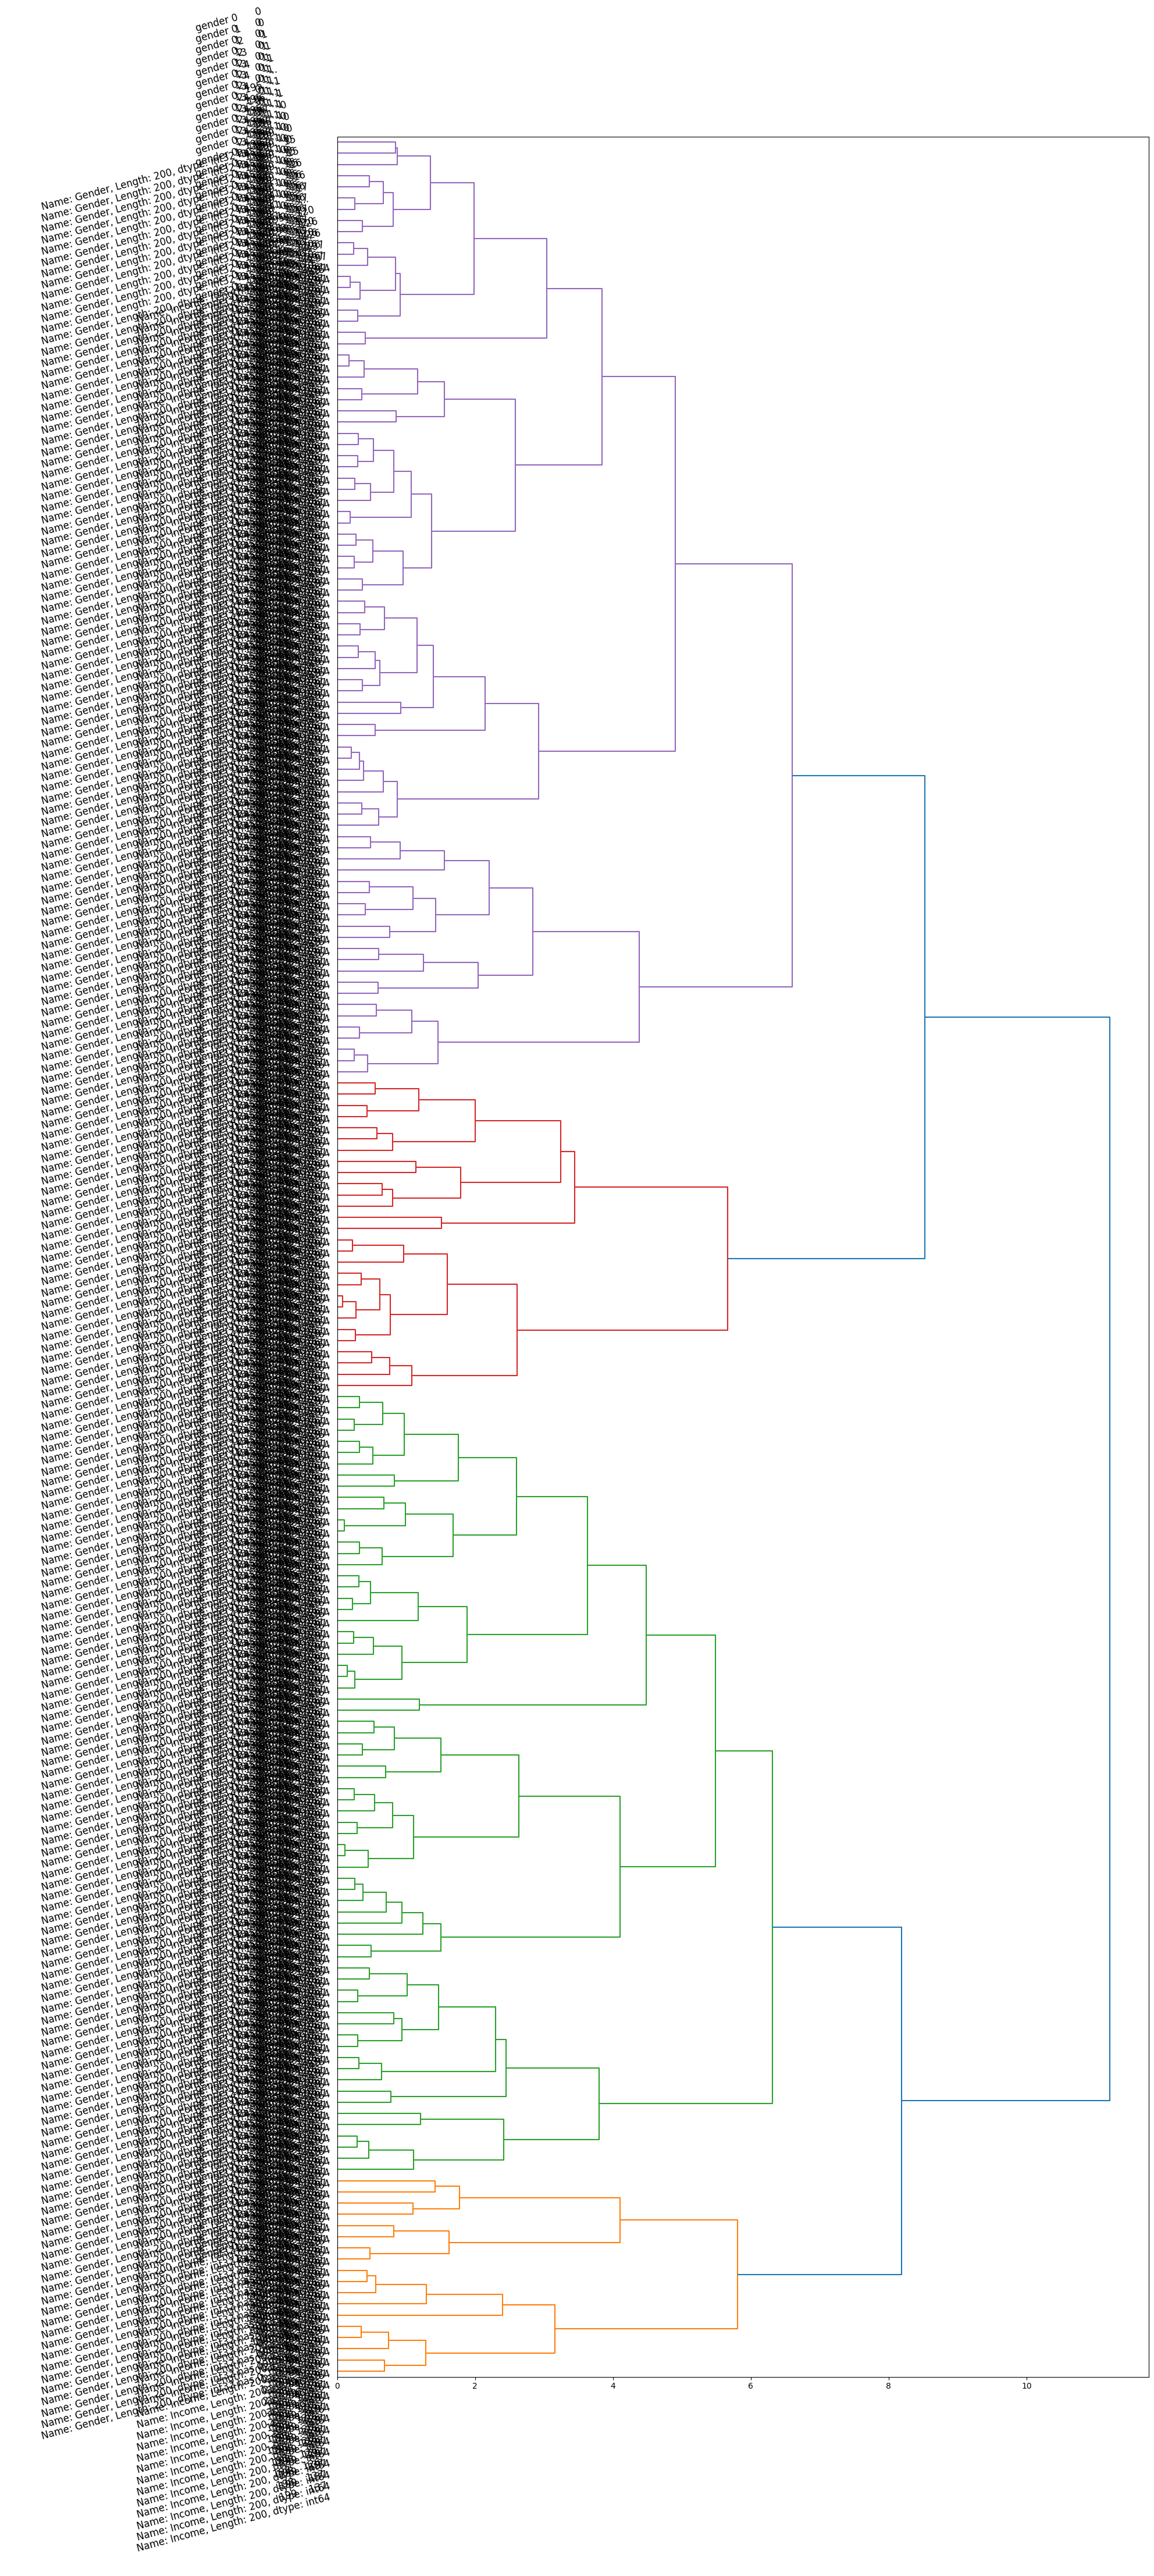

In [67]:
fig=plt.figure(figsize=(18,50))
def llf(id):
    return f'gender {cdf.Gender} has {cdf.Income}'
dendro = hierarchy.dendrogram(z,  leaf_label_func=llf, leaf_rotation=15, leaf_font_size =12, orientation = 'right')

In [68]:
agglom=AgglomerativeClustering(n_clusters=5,linkage='complete')
agglom.fit(distMatrix)
agglom.labels_

C:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_agglomerative.py:586: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  out = hierarchy.linkage(X, method=linkage, metric=affinity)


array([1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 1, 2, 1, 1, 2, 1, 1,
       2, 1, 2, 1, 2, 1, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2,
       2, 2, 3, 3, 3, 3, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 0, 0, 4, 3, 0, 0,
       3, 4, 0, 3, 0, 3, 4, 4, 0, 0, 3, 0, 3, 3, 0, 0, 0, 3, 3, 0, 3, 3,
       3, 3, 4, 0, 0, 3, 3, 0, 3, 3, 0, 0, 3, 3, 0, 0, 0, 3, 4, 0, 0, 0,
       0, 3, 3, 0, 3, 3, 4, 3, 3, 3, 0, 3, 3, 0, 3, 3, 0, 0, 0, 0, 0, 0,
       3, 3, 0, 3, 4, 0, 0, 3, 4, 0, 3, 3, 0, 0, 0, 3, 4, 0, 0, 0, 4, 3,
       4, 3, 0, 3, 0, 3, 4, 3, 0, 3, 0, 3, 0, 3, 4, 0, 0, 0, 0, 0, 4, 3,
       0, 0, 0, 0, 4, 3, 0, 3, 4, 0, 4, 0, 4, 3, 4, 3, 0, 3, 4, 3, 4, 0,
       0, 0], dtype=int64)

In [69]:
cdf['Cluster_number']=agglom.labels_
cdf.head(5)

ID  Gender  Age  Income  Score  ClusterNumber  Cluster_number
0   1       0   19      15     39              3               1
1   2       0   21      15     81              4               1
2   3       1   20      16      6              3               2
3   4       1   23      16     77              4               2
4   5       1   31      17     40              3               2

C:\Users\admin\AppData\Local\Temp\ipykernel_24248\2713234030.py:13: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset.Age, subset.Income, s= subset.Income*2, c=color, label='cluster'+str(label),alpha=0.5)
C:\Users\admin\AppData\Local\Temp\ipykernel_24248\2713234030.py:13: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset.Age, subset.Income, s= subset.Income*2, c=color, label='cluster'+str(label)

Text(0, 0.5, 'Income')

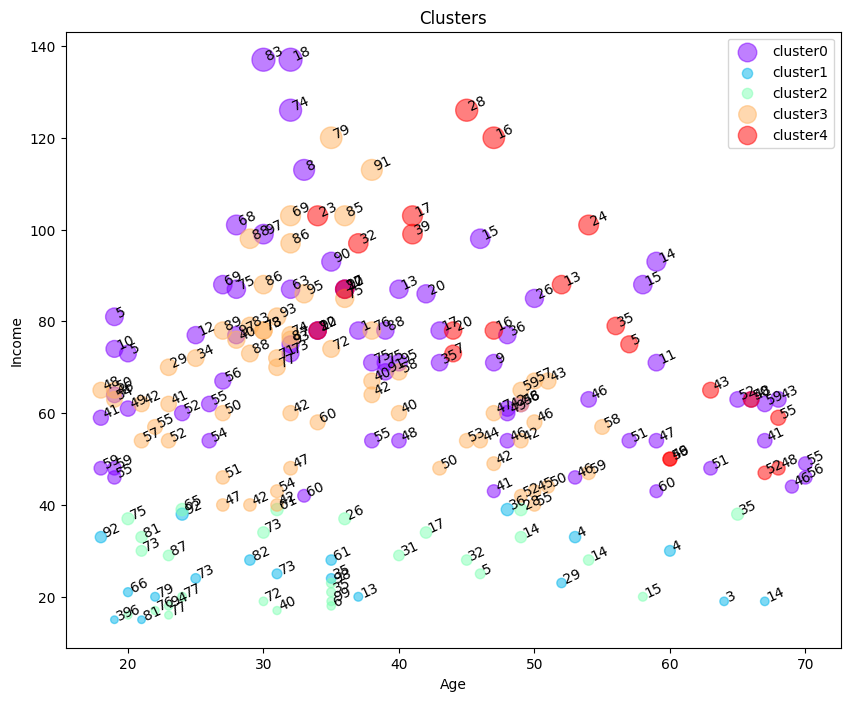

In [70]:
import matplotlib.cm as cm
n_clusters = max(agglom.labels_)+1 ## because it starts with 0
colors = cm.rainbow(np.linspace(0, 1, n_clusters)) # making rainbow color number between 0 and 1 with 6 slices
cluster_labels = list(range(0, n_clusters))

# Create a figure of size 6 inches by 4 inches.
plt.figure(figsize=(10,8))

for color, label in zip(colors, cluster_labels):
    subset = cdf[cdf.Cluster_number == label]
    for i in subset.index:
            plt.text(subset.Age[i], subset.Income[i],str(subset['Score'][i]), rotation=25) 
    plt.scatter(subset.Age, subset.Income, s= subset.Income*2, c=color, label='cluster'+str(label),alpha=0.5)
plt.legend()
plt.title('Clusters')
plt.xlabel('Age')
plt.ylabel('Income')

In [71]:
cdf.groupby(['Cluster_number','Gender'])['Cluster_number'].count()

Cluster_number  Gender
0               0         70
1               0         18
2               1         28
3               1         62
4               1         22
Name: Cluster_number, dtype: int64

In [72]:
agg_user=cdf.groupby(['Gender','Cluster_number'])[['Age','Income','Score']].mean()
agg_user

Age     Income      Score
Gender Cluster_number                                 
0      0               40.614286  71.742857  48.471429
       1               36.666667  25.222222  48.666667
1      2               34.535714  27.000000  50.428571
       3               35.145161  66.338710  59.387097
       4               50.954545  80.318182  30.772727

## Now , I make a plot based on the mean of values of each cluser

C:\Users\admin\AppData\Local\Temp\ipykernel_24248\3486959249.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(subset.loc[i][0]+5, subset.loc[i][2], 'Cluster Number is='+str(int(i)) )
C:\Users\admin\AppData\Local\Temp\ipykernel_24248\3486959249.py:6: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset.Age, subset.Score, s=subset.Income*20, c=color, label='cluster'+str(label))


KeyError: (2,)

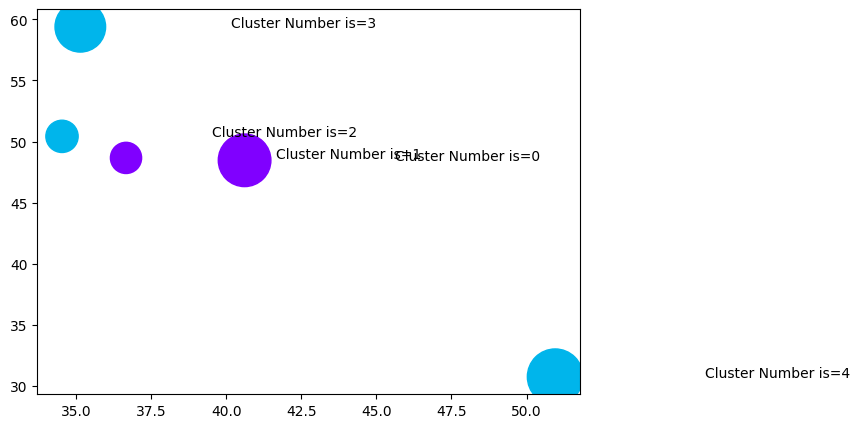

In [73]:
plt.figure(figsize=(7,5))
for color, label in zip(colors, cluster_labels):
    subset = agg_user.loc[(label,),]
    for i in subset.index:
        plt.text(subset.loc[i][0]+5, subset.loc[i][2], 'Cluster Number is='+str(int(i)) )
    plt.scatter(subset.Age, subset.Score, s=subset.Income*20, c=color, label='cluster'+str(label))
plt.legend()
plt.title('Clusters')
plt.xlabel('Age')
plt.ylabel('Score')

# Clustering based on DBscan

In [74]:
from sklearn.cluster import dbscan

In [93]:
from sklearn.cluster import DBSCAN  

# فرض می‌کنیم که 'cdf' یک DataFrame است  
xx = cdf.values[:,1:]  
xx = np.nan_to_num(xx)  
feature_mtx = MinMaxScaler().fit_transform(xx)  

epsilon = 0.3  
minimumsamples = 11 
db = DBSCAN(eps=epsilon, min_samples=minimumsamples).fit(feature_mtx)  
labels = db.labels_  

print(labels)
np.histogram(labels)

[-1 -1 -1  0 -1  0 -1  0 -1  0 -1  0 -1  0 -1 -1 -1 -1 -1  0 -1 -1 -1 -1
 -1 -1 -1 -1 -1  0 -1  0 -1 -1 -1  0 -1  0 -1  0 -1 -1 -1  0 -1  0  1  1
  1  1  1  2  1  2  1  2  1  2  1  2  2  2 -1  1  2  2  1 -1  2  1  2  1
  1  1  2  2  1  2  1  1  2  2  2  1  1  2  1  1  1  1 -1  2  2  1  1  2
  1  1  2  2  1  1  2  2  2  1 -1  2  2  2  2  1  1  2  1  1 -1  1  1  1
  2  1  1  3  1  4  2  3  5  3  5  3  1  4  5  4  6  3 -1  4  6  3  1  4
  5  3  2  4  6  3  5  3  6  4  6  4  5  4  5  4  6  4  5  4  5  4  5  4
  6  3  5  3  5  3  6  4  5  3  5  3  6  4  5  4  6  3  6  3  6  4  6  4
  5  4  6  4  6 -1 -1 -1]


(array([41, 14, 43,  0, 34, 16,  0, 21, 16, 15], dtype=int64),
 array([-1. , -0.3,  0.4,  1.1,  1.8,  2.5,  3.2,  3.9,  4.6,  5.3,  6. ]))

In [94]:
# Firts, create an array of booleans using the labels from db.
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
core_samples_mask

array([False, False, False,  True, False,  True, False,  True, False,
        True, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False,  True, False, False, False,  True,
       False,  True, False,  True, False, False, False, False, False,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True, False,  True,  True,  True,  True,
       False, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False, False,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True, False,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True, False,  True,
       False,  True,

In [95]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_clusters_

7

In [96]:
# Remove repetition in labels by turning it into a set.
unique_labels = set(labels)
unique_labels

{-1, 0, 1, 2, 3, 4, 5, 6}

# data visualization

In [97]:
# Create colors for the clusters.
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))

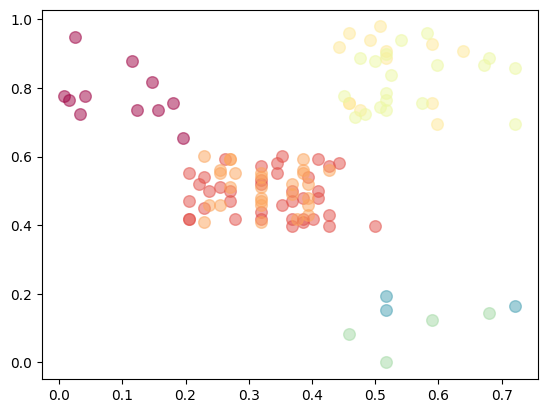

In [106]:
# Plot the points with colors
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'

    class_member_mask = (labels == k)

    # Plot the datapoints that are clustered
    xy = feature_mtx[class_member_mask & core_samples_mask]
    plt.scatter(xy[:, 2], xy[:, 3],s=70, c=[col], marker=u'o', alpha=0.5)

    # Plot the outliers
    #xy = feature_mtx[class_member_mask & ~core_samples_mask]
    #plt.scatter(xy[:, 3], xy[:, 2],s=70, c=[col], marker=u'o', alpha=0.5)